# Nonlinearities

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from tqdm import tqdm
from tensorflow.keras.utils import to_categorical

import torch
from torch import nn
from torchsummary import summary

(240, 2) (60, 2) (240,) (60,)


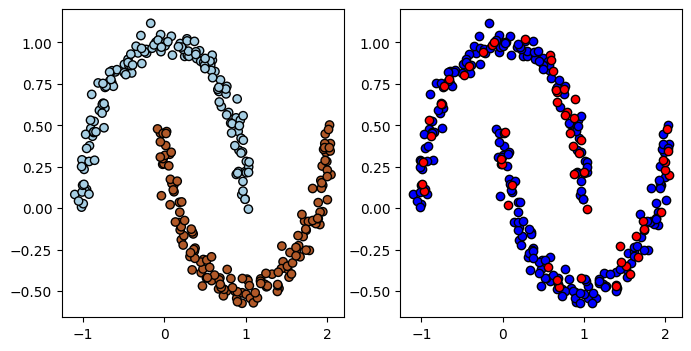

In [2]:
# Configuration options
num_classes = 2
X, y = make_moons(n_samples= 300 , noise=0.05)

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.20, random_state = 1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

_, axes = plt.subplots (1,2, figsize=(8,4))

axes[0].scatter(X[:,0], X[:,1], c=y, edgecolors='k' ,cmap='Paired')
axes[1].scatter(X_train[:,0], X_train[:,1], c='b', edgecolors='k')
axes[1].scatter(X_test[:,0], X_test[:,1], c='r', edgecolors='k')

In [18]:
# # Convert into greyscale
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [3]:
# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Set the input shape
input_shape = (X_train.shape)
print(f'Feature shape: {input_shape}')

Feature shape: (240, 2)


In [5]:
#el anterios solo se puede correr una vez
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 2) (60, 2) (240, 2) (60, 2)


## Create a graph model

In [10]:
model = nn.Sequential(
    #piede el numero de entradas(2)o caracteristicas
    #cuantos perceptrones va utilizar(2)
    nn.Linear(2, 2), #nn.ReLU(),
    #nn.Linear(10, 2)
)

#model.cuda()
#sumary hace el resumen del modelo
summary(model, input_size=(2,), device='cpu')
# print (model)

#este imprime x0[m00],x1[m01],b[0], [m10],[m11],b[2] = parametros

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               6
Total params: 6
Trainable params: 6
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Define loss function and optimizer

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

model.cuda()
loss.cuda()

CrossEntropyLoss()

## Train model

In [ ]:
epochs = 800
batch_size = 200
losses = []

start_time = time.time()
progress = tqdm(range( _ ), ncols=110)

for epoch in progress:
  #
  batch_losses = 0

  for batch_i in range(0, len(X_train), batch_size):
    #
    batch_X = X_train[ _ : _ ]
    batch_y = y_train[ _ : _ ]
    batch_X = torch.from_numpy(batch_X).to(torch.float32).cuda()
    batch_y = torch.from_numpy(batch_y).to(torch.float32).cuda()

    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    predictions = model( _ )

    # Compute loss
    batch_loss = loss( _ , _ )

    # Perform backward pass
    batch_loss.backward()

    # Optimize parameters
    optimizer.step()

    ## Save stats
    batch_losses += batch_loss.item()

    elapsed_time = time.time() - start_time

  progress.set_description("Epoch [%d/%d] [Loss: %f] time: %3f" % (epoch, epochs,
                                                                   batch_loss.item(),
                                                                   elapsed_time))

  losses.append(batch_losses/(len(X_train)/batch_size))


## Plot results

In [ ]:
import seaborn as sns

plt.plot(np.array(losses))
plt.xlabel("Epoch")

In [ ]:
h_min, h_max = _ .min()-0.2, _ .max()+0.2
v_min, v_max = _ .min()-0.1, _ .max()+0.1

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( _ , _ , 1000), np.linspace( _ , _ , 1000))

# Predecir los valores del grid
grid_ = torch.from_numpy( _ ).to(torch.float32).cuda()
predictions = model( _ )
predictions = np.argmax( _ , axis=1)
print (predictions.shape)

# Encajar las predicciones al tamaño del grid
predictions = predictions.reshape(h_grid.shape)
print (predictions.shape)

In [ ]:
_, ax = plt.subplots (figsize=(5,5))

# Put the result into a color plot
plt.pcolormesh( _ , _ , _ , cmap=plt.cm.Paired, alpha=0.9)

ax.scatter( _ , _ , c = _ , edgecolors='k', s=10, cmap=plt.cm.Paired)

ax.set_xlim(h_grid.min()-.1, h_grid.max()+.1)
ax.set_ylim(v_grid.min()-.1, v_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())